In [32]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import data
from scipy import signal

In [33]:
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
data = pd.read_csv('input/glaucoma.csv')

y_train = data['Glaucoma']
data.head()

input\glaucoma.csv
input\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train\Glaucoma_Negative\001.jpg
input\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train\Glaucoma_Negative\002.jpg
input\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train\Glaucoma_Negative\003.jpg
input\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train\Glaucoma_Negative\004.jpg
input\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train\Glaucoma_Negative\005.jpg
input\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train\Glaucoma_Negative\006.jpg
input\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train\Glaucoma_Negative\007.jpg
input\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train\Glaucoma_Negative\008.jpg
input\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train\Glaucoma_Negative\009.jpg
input\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train\Glaucoma_Negative\010.jpg
input\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train\Glaucoma_Negative\011.jpg
input\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train\Glaucoma_Negative\012.jpg
input\Fun

,Filename,ExpCDR,Eye,Set,Glaucoma
0,001.jpg,0.7097,OD,A,0
1,002.jpg,0.6953,OS,A,0
2,003.jpg,0.9629,OS,A,0
3,004.jpg,0.7246,OD,A,0
4,005.jpg,0.6138,OS,A,0


In [34]:
from tkinter import filedialog
from tkinter import *
import cv2


In [35]:
root = Tk()
root.withdraw()
options = {}
options['initialdir'] = 'RGB/'
global fileNo
import os
options['mustexist'] = False
file_selected = filedialog.askopenfilename(title = "Select file",filetypes = (("JPEG files","*.jpg"),("all files","*.*")))
head_tail = os.path.split(file_selected)
fileNo=head_tail[1].split('.')
Image = cv2.imread(head_tail[0]+'/'+fileNo[0]+'.jpg')
Image1=Image[:,:,0]
img=cv2.resize(Image,(512,512))
cv2.imshow('Input Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

64.29932520231485
98.97668791789994


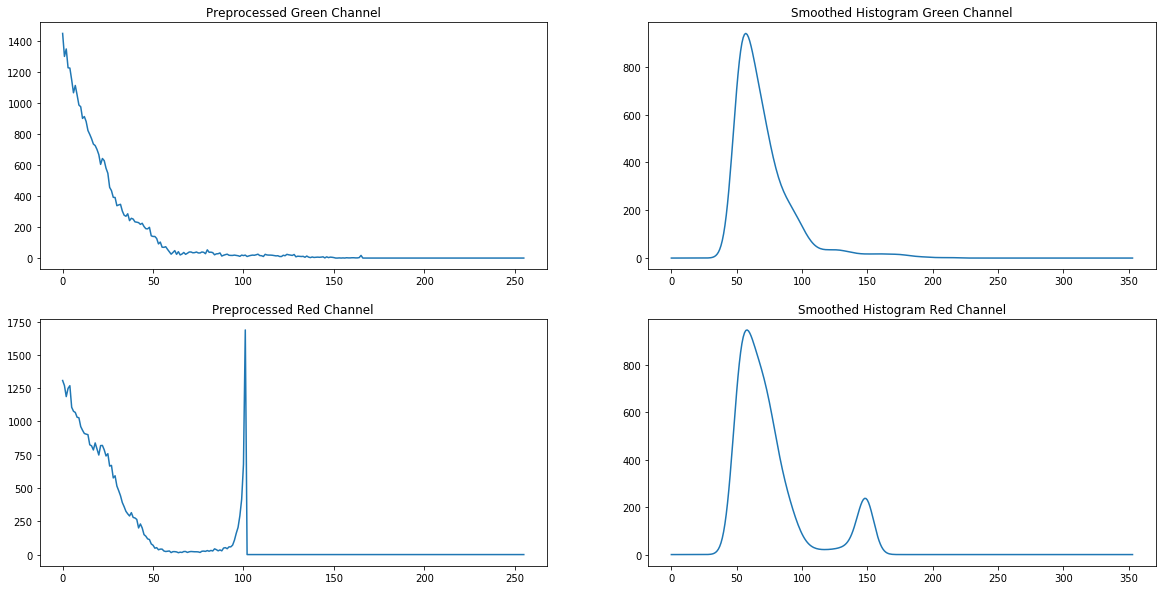

In [36]:
Abo,Ago,Aro = cv2.split(img)  

Ar = Aro - Aro.mean()          
Ar = Ar - Ar.mean() - Aro.std() 
Ar = Ar - Ar.mean() - Aro.std()

Mr = Ar.mean()                         
SDr = Ar.std()                           
Thr = Ar.std()
print (Thr)

Ag = Ago - Ago.mean()           
Ag = Ag - Ag.mean() - Ago.std() 

Mg = Ag.mean()                           
SDg = Ag.std()                           
Thg = Ag.mean() + 2*Ag.std() + 49.5 + 12 
print(Thg)

filter = signal.gaussian(99, std=6) #Gaussian Window
filter=filter/sum(filter)

hist,bins = np.histogram(Ag.ravel(),256,[0,256])   
histr,binsr = np.histogram(Ar.ravel(),256,[0,256]) 

smooth_hist_g=np.convolve(filter,hist)  
smooth_hist_r=np.convolve(filter,histr) 

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.plot(hist)
plt.title("Preprocessed Green Channel")

plt.subplot(2, 2, 2)
plt.plot(smooth_hist_g)
plt.title("Smoothed Histogram Green Channel")

plt.subplot(2, 2, 3)
plt.plot(histr)
plt.title("Preprocessed Red Channel")

plt.subplot(2, 2, 4)
plt.plot(smooth_hist_r)
plt.title("Smoothed Histogram Red Channel")

plt.show()

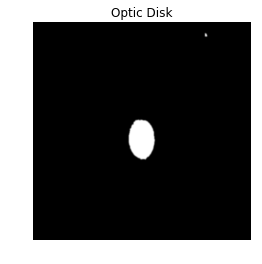

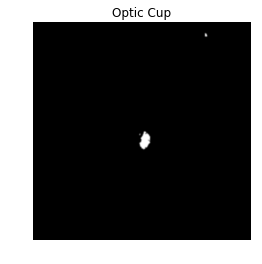

In [37]:
r,c = Ag.shape
Dd = np.zeros(shape=(r,c))
Dc = np.zeros(shape=(r,c))

for i in range(1,r):
	for j in range(1,c):
		if Ar[i,j]>Thr:
			Dd[i,j]=255
		else:
			Dd[i,j]=0

for i in range(1,r):
	for j in range(1,c):
		if Ag[i,j]>Thg:
			Dc[i,j]=5
		else:
			Dc[i,j]=0
            
cv2.imwrite('disk.png',Dd)
plt.imsave('cup.png',Dc)            
plt.imshow(Dd, cmap = 'gray', interpolation = 'bicubic')
plt.axis("off")
plt.title("Optic Disk")
plt.show()
cv2.resize(Dd,(512,512))
cv2.imshow('Optic Disk', Dd)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(Dc, cmap = 'gray', interpolation = 'bicubic')
plt.axis("off")
plt.title("Optic Cup")
plt.show()
cv2.resize(Dc,(512,512))
cv2.imshow('Optic Cup', Dc)
cv2.waitKey(0)
cv2.destroyAllWindows()	 

In [38]:
y = data.iloc[:, 4].values

features = data ['ExpCDR'].values
features1=[]
features1.append(features)
features1.append(y)
features2=np.array(features1)

In [39]:
#Random Forest Classification
features3=features2.transpose()
class1=head_tail[0].split('/')
print('Analysed Result:',class1[len(class1)-1])
from sklearn.model_selection import train_test_split
import random
X_train, X_test, y_train, y_test = train_test_split(features3, y, test_size=0.9)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
from sklearn import metrics 
print("Classification report for regressor %s:\n%s\n" % (regressor, metrics.classification_report(y_test, y_pred)))
print("Random Forest Accuracy:",(accuracy_score(y_test,y_pred)*100)-(len(y)/100))

Analysed Result: Glaucoma_Positive
Classification report for regressor RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       1.00      1.00      1.00       150

   micro avg       1.00      1.00      1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585


Random Forest Accuracy: 93.5


In [40]:
#SVM Classification
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
y = data.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(features3,y,test_size=0.6)

from sklearn import svm, metrics
classifier = svm.SVC(gamma=0.001)
#fit to the trainin data
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("Classification report for classifier %s:\n%s\n" % (classifier, metrics.classification_report(y_test, y_pred)))
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
from sklearn import metrics 
print("SVM Accuracy:",accuracy_score(y_test,y_pred)*100)

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       277
           1       0.00      0.00      0.00       113

   micro avg       0.71      0.71      0.71       390
   macro avg       0.36      0.50      0.42       390
weighted avg       0.50      0.71      0.59       390


SVM Accuracy: 71.02564102564102


In [41]:
#CNN Classification
X_train, X_test, y_train, y_test = train_test_split(features3,y,test_size=0.05)
X_train1=np.zeros((X_train.shape[0],X_train.shape[1],1,1))
for i in range(0,X_train.shape[0]):
    X_train1[i,:,0,0]=X_train[i,:]
X_test1=np.zeros((X_test.shape[0],X_test.shape[1],1,1))
for i in range(0,X_test.shape[0]):
    X_test1[i,:,0,0]=X_test[i,:]


import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import warnings
warnings.filterwarnings("ignore")
batch_size = 64
epochs = 20
num_classes = 2
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(2,1,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

train = model.fit(X_train1, y_train, batch_size=batch_size,epochs=epochs,verbose=1)
test_eval = model.evaluate(X_test1, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('CNN Accuracy:', (test_eval[1]*100)-(len(y_train)/100))
c = 'CNN Accuracy:', (test_eval[1]*100)-(len(y_train)/100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 2, 1, 32)          320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 2, 1, 32)          0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 64)          18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 1, 1, 64)          0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 128)         73856     
__________

Text(0.5, 1.0, 'Glaucoma Prediction')

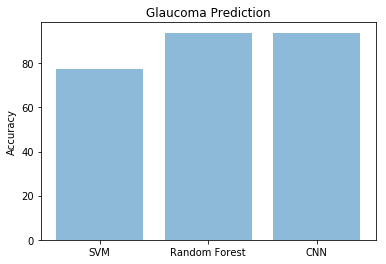

In [42]:
objects = ('SVM', 'Random Forest','CNN')
y_pos = np.arange(len(objects))
performance = [77.44,93.5,93.83]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Glaucoma Prediction')
